- This notebook is to show Informativeness metrics for active learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from numpy import arange

import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct 

import numpy as np
import pandas as pd
from tqdm import tqdm
from numpy import save
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import pdist, squareform
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KernelDensity
from scipy.stats import wasserstein_distance
import pickle

In [6]:
myfile =r'../Data/CombinedPSP.csv'
df_load = pd.read_csv(myfile)

df_load['JSC']=df_load['JSC'].abs()
df_reduce=df_load.iloc[:,3:]
df_refine=df_reduce.iloc[:,np.r_[0:3,4:23]]

x = df_refine.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df_refine_standardize = pd.DataFrame(x_scaled)
df_refine_standardize.columns=df_refine.columns
df_refine_standardize

X = df_refine_standardize.loc[:,['STAT_e', 'DISS_f10_D', 'CT_n_D_adj_An', 'CT_n_A_adj_Ca', 'DISS_wf10_D']]    
y = df_refine_standardize.loc[:,['JSC']]     

In [8]:
def load_pickle_data(file_path):
    # Load the .pkl file
    with open(file_path, 'rb') as file:
        load_data = pickle.load(file)
        
    return load_data

In [9]:
load_data1 = load_pickle_data('../Results_Data/Random_results_data_2023-12-29_10-21-38.pkl')
load_data2 = load_pickle_data('../Results_Data/Uncertainty_results_data_2023-12-29_13-47-17.pkl')
load_data3 = load_pickle_data('../Results_Data/GSx_results_data_2023-12-29_15-56-53.pkl')
load_data4 = load_pickle_data('../Results_Data/GSy_results_data_2023-12-29_21-00-15.pkl')
load_data5 = load_pickle_data('../Results_Data/iGS_results_data_2023-12-30_16-13-33.pkl')

In [11]:
load_data1.keys()

dict_keys(['R2Smooth_std1', 'accuracySmooth1', 'InfoSmooth_std1', 'InfoSmooth_mean1', 'MSEsmooth_std1', 'MSEsmooth1', 'MAEsmooth_std1', 'MAEsmooth1', 'R2_train_std1', 'R2_train_mean1', 'R2_train_stdS1', 'R2_train_meanS1', 'SelectData1'])

In [18]:
d1, s1, d2, s2, d3, s3, d4, s4, d5, s5 = load_data1['InfoSmooth_mean1'], load_data1['InfoSmooth_std1'],\
load_data2['InfoSmooth_mean1'], load_data2['InfoSmooth_std1'],\
load_data3['InfoSmooth_mean1'], load_data3['InfoSmooth_std1'],\
load_data4['InfoSmooth_mean1'], load_data4['InfoSmooth_std1'],\
load_data5['InfoSmooth_mean1'], load_data5['InfoSmooth_std1']

In [19]:
def plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, filename):
    fig, ax = plt.subplots()

    # offset = 10
    error_freq = 30
    
    # List of your datasets and their corresponding standard deviation arrays
    datasets = [d1, d2, d3, d4, d5]
    std_devs = [s1, s2, s3, s4, s5]
        
    labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
    # colors = ['blue', 'orange', 'green', 'purple', 'red']
    tableau_colors = plt.get_cmap('tab10').colors[:5]
    # Shift 4th and 5th colors to the first two positions
    shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    offsets = [10, 20, 30, 40, 50]
    
    for i, (dataset, std_dev, label, color, offset) in enumerate(zip(datasets, std_devs, labels, shifted_colors, offsets)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        p = ax.plot(x+10, y, label=label, color=color)
    
        xe, ye, ee = (x+10)[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # plt.hlines(y=e0,label='Etropy for all data',color='k',xmin=10, xmax=500, linestyle='--')
    
    plt.xlabel('Number of samples')
    plt.ylabel('Mean uncertainty')
    plt.legend()
    plt.savefig(filename, dpi=200)
    plt.show()

In [20]:
filename='Results_Info'

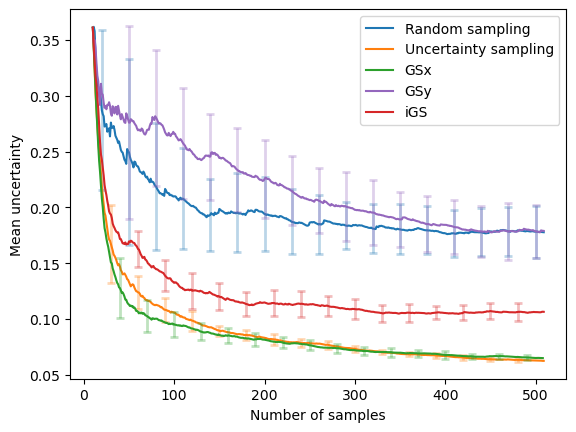

In [21]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, filename)